Pycaret 설치

pip install pycaret

# Pycaret Classification Tutorial for Beginners
## 목차
#### 1. Library : 사용할 패키지를 불러옵니다.
#### 2. Load Dataset : 사전에 만들어둔 데이터를 불러옵니다.
#### 3. Setup Environment : Pycaret을 활용하기 위한 환경을 만들어줍니다.
#### 4. Compare Models : 데이터에 적합한 모델을 찾기 위해 다양한 모델을 비교합니다.
#### 5. Create Models : 사용할 모델을 만듭니다.
#### 6. Tune Models : 생성된 모델을 튜닝합니다.
#### 7. Plot Models : 모델의 결과를 그립니다.
#### 8. Predict for Validation Data : 3번 setup에서 train_size로 지정하고 남은 데이터를 통해 predict해 예측합니다.
#### 9 .Finalize for Deployment
#### 10. Prediction
#### 11. Save Model
#### 12. Load Model
#### 13. Submit

### 제가 생각하는 Beginner Level에서의 Pipeline
(Data Preprocessing) -> Setup : 환경 설정 -> Compare Models : 데이터에 적합한 모델 찾기 -> Create & Tune Model -> Plot & EDA -> Finalize Model -> Deploy -> Prediction
##### 이후에는 Model Ensemble, Voting, Stacking 등 다양한 단계를 추가할 수 있을 것 같습니다.

## `1. Library`

In [1]:
import pandas as pd
from pycaret.classification import *
from time import time

data_path = '../data/'

## `2. Load Dataset`
- Data Engineering : https://dacon.io/competitions/official/235647/codeshare/2425?page=1&dtype=recent&ptype=pub

In [2]:
train = pd.read_csv(data_path+'final_train.csv')
test = pd.read_csv(data_path+'final_test.csv')

display(train.head())
display(test.head())

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_12_0,wr_12_1,wr_13_0,wr_13_1,wf_01_0,wf_01_1,wf_02_0,wf_02_1,wf_03_0,wf_03_1
0,0,0.563033,1.931109,0.557456,2.106971,0.574759,2.067591,0.549449,2.070962,0.538197,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,0.500437,2.011416,0.627831,2.101794,0.570634,2.211346,0.544993,2.196815,0.537259,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,0.494825,2.127356,0.487898,2.116312,0.499742,2.070592,0.561308,2.210925,0.538739,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,0.563033,1.977486,0.561204,2.168581,0.530138,2.066955,0.548998,2.206644,0.537259,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,0.564892,2.058350,0.487898,2.023194,0.574759,1.990961,0.537439,2.075540,0.537259,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_12_0,wr_12_1,wr_13_0,wr_13_1,wf_01_0,wf_01_1,wf_02_0,wf_02_1,wf_03_0,wf_03_1
0,0,0.563033,736,0.522095,2941,0.570634,4621,0.549449,4857,0.538197,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,0.563033,514,0.522095,1952,0.570634,1552,0.548998,821,0.534566,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,0.563033,500,0.522095,2507,0.530138,480,0.537439,614,0.538197,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,0.564892,669,0.487898,1050,0.574759,1435,0.537439,2252,0.538739,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,0.540892,499,0.487898,1243,0.574759,845,0.537439,1666,0.538197,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


## `3. Setup Environment : 여기서 데이터에 대한 추가적인 engineering이 가능합니다`

- data : 사용할 데이터를 입력해 줍니다.

- target : data에서 어떤 데이터를 target으로 할 지 입력합니다. 우리는 투표이기 때문에 "voted"를 입력할 예정입니다.

- train_size : train_test_split과 동일하다고 생각하시면 됩니다. train_size만큼 학습하고, 나머지는 validation data로 사용합니다.

- sample_estimator : 어떤 모델로 예측해 볼 것인지를 입력합니다. 입력하지 않으면 Logistic Regression Model이 자동으로 사용됩니다. 이 sample_estimator를 통해서 다양한 것들을 예측하는데, 대표적으로 train_size를 몇으로 사용할지를 정할 수 있습니다.

- categorical_features : 범주형 변수를 여기에 입력할 수 있습니다.

- silent : True로 설정하면, 입력된 데이터의 형태에 따라서 알아서 데이터를 조정합니다.

- remove_perfect_collinearity : True로 설정하면 상관관계가 1인 피쳐를 삭제합니다.

- fix_imbalance : True로 설정하면 SMOTE를 적용합니다. SMOTE는 클래스가 적은 데이터의 표본을 임의의 값으로 변형해 데이터를 추가하는 방법입니다.

- fix_imbalance_method : imblearn에서 제공하는 다양한 모듈을 적용할 수 있습니다.

- data_split_shuffle : False로 설정하면 데이터 split을 할 때 shuffle하는 것을 막습니다.

- folds_shuffle : False로 설정하면 cross-validation을 할 때 shuffle하는 것을 막습니다.

- n_jobs : 몇개의 processor를 이용할지 입력할 수 있습니다.

- log_experiment : True로 설정하면 로그를 MLFlow 서버에 기록합니다.

- experiment_name : 로그를 기록할 때 사용할 이름입니다.

- log_plots : True로 설정하면 MLFlow에 정확한 plot이 기록됩니다.

- log_profile : True로 설정하면 html파일이 MLFlow에 저장됩니다.

- log_data : True로 설정하면 train, test 데이터가 csv파일로 저장됩니다.

- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [3]:
cell_start_time = time()
clf = setup(data = train, target='voted', silent=True)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

Setup Succesfully Completed!


,Description,Value
0,session_id,5335
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(45532, 95)"
4,Missing Values,False
5,Numeric Features,59
6,Categorical Features,35
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


CELL RUN TIME :  11.458380699157715


## `4. 데이터에 적합한 모델을 찾기 위해 Compare Models 사용하기`
- top 5 모델 (Pycaret에서 부르는 약칭)
    - Gradient Boosting Classifier (gbc)
    - Catboost Classifier (catboost)
    - Light Gradient Boosting Machine (lightgbm)
    - Linear Discriminant Analysis (lda)
    - Logistic Regression (lr)

In [4]:
cell_start_time = time()
top5_models = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.697,0.769,0.665,0.752,0.706,0.396,0.399,18.009
1,Gradient Boosting Classifier,0.697,0.768,0.654,0.759,0.702,0.397,0.402,22.022
2,Light Gradient Boosting Machine,0.694,0.767,0.652,0.755,0.699,0.391,0.395,0.728
3,Linear Discriminant Analysis,0.691,0.763,0.669,0.741,0.703,0.383,0.385,0.702
4,Logistic Regression,0.688,0.762,0.685,0.729,0.706,0.375,0.376,0.453
5,Ada Boost Classifier,0.691,0.759,0.657,0.747,0.699,0.384,0.387,4.939
6,Extra Trees Classifier,0.686,0.757,0.668,0.733,0.699,0.372,0.374,2.517
7,Extreme Gradient Boosting,0.674,0.747,0.667,0.716,0.691,0.346,0.347,5.227
8,Random Forest Classifier,0.653,0.706,0.612,0.713,0.659,0.310,0.314,0.298
9,Naive Bayes,0.622,0.679,0.498,0.725,0.591,0.262,0.278,0.079


CELL RUN TIME :  913.0104446411133


In [5]:
top5_models

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=5335, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

## `5. Create Models`
#### create_model(estimator = None, ensemble = False, method = None, fold = 10, round = 4, cross_validation = True, verbose = True, system = True, **kwargs)

- estimator : 어떤 모델을 사용할 것인가?
- ensemble : estimator를 앙상블 한 결과를 나타냅니다.
- method : bagging, boosting 선택 가능합니다.
- fold : K-fold의 수로, 최소 2 이상의 숫자를 입력합니다.
- round : 점수 반올림으로 표시할 자리를 적습니다.
- cross_validation : True로 설정하면 cross_validation을 사용합니다.
- verbose : True로 설정하면 진행중인 상황이 나타납니다.
- system : internal function으로 인해 바뀌는 것을 제외하고는 항상 True를 입력해야 합니다.

In [6]:
total_models = []
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


#### Gradient Boosting Classifier (gbc)

In [7]:
cell_start_time = time()
model_gbc = create_model('gbc', fold = 5)
total_models.append(model_gbc)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6980,0.7669,0.6690,0.7515,0.7078,0.3976,0.4005
1,0.6982,0.7683,0.6595,0.7572,0.7050,0.3991,0.4031
2,0.6985,0.7694,0.6509,0.7629,0.7025,0.4007,0.4059
3,0.6945,0.7643,0.6416,0.7621,0.6967,0.3936,0.3995
4,0.6956,0.7695,0.6488,0.7595,0.6998,0.3950,0.4001
Mean,0.6970,0.7677,0.6539,0.7587,0.7024,0.3972,0.4018
SD,0.0016,0.0019,0.0094,0.0041,0.0039,0.0026,0.0024


CELL RUN TIME :  131.4622368812561


#### Catboost Classifier (catboost)

In [8]:
cell_start_time = time()
model_catboost = create_model('catboost', fold = 5)
total_models.append(model_catboost)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_catboost

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6996,0.7684,0.6767,0.7496,0.7113,0.3999,0.4022
1,0.6925,0.7686,0.6664,0.7446,0.7033,0.3863,0.3889
2,0.6991,0.7708,0.6592,0.7589,0.7056,0.4010,0.4052
3,0.6930,0.7628,0.6531,0.7526,0.6993,0.3889,0.3930
4,0.7000,0.7720,0.6686,0.7548,0.7091,0.4018,0.4050
Mean,0.6968,0.7685,0.6648,0.7521,0.7057,0.3956,0.3988
SD,0.0034,0.0031,0.0081,0.0048,0.0042,0.0066,0.0067


CELL RUN TIME :  104.1737174987793


#### Light Gradient Boosting Machine (lightgbm)

In [9]:
cell_start_time = time()
model_lightgbm = create_model('lightgbm', fold = 5)
total_models.append(model_lightgbm)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_lightgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6966,0.7680,0.6615,0.7536,0.7046,0.3955,0.3991
1,0.6930,0.7687,0.6549,0.7517,0.7000,0.3887,0.3926
2,0.6933,0.7669,0.6466,0.7571,0.6975,0.3903,0.3954
3,0.6898,0.7613,0.6387,0.7561,0.6925,0.3841,0.3896
4,0.6961,0.7691,0.6574,0.7551,0.7029,0.3949,0.3989
Mean,0.6938,0.7668,0.6518,0.7547,0.6995,0.3907,0.3951
SD,0.0024,0.0029,0.0082,0.0019,0.0042,0.0042,0.0036


CELL RUN TIME :  4.728419303894043


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5335, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Linear Discriminant Analysis (lda)

In [10]:
cell_start_time = time()
model_lda = create_model('lda', fold = 5)
total_models.append(model_lda)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_lda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6894,0.7641,0.6756,0.7350,0.7040,0.3785,0.3800
1,0.6916,0.7632,0.6770,0.7375,0.7060,0.3830,0.3845
2,0.6983,0.7652,0.6721,0.7502,0.7090,0.3977,0.4003
3,0.6854,0.7590,0.6562,0.7392,0.6952,0.3726,0.3754
4,0.6912,0.7658,0.6666,0.7424,0.7024,0.3835,0.3859
Mean,0.6912,0.7634,0.6695,0.7409,0.7033,0.3831,0.3853
SD,0.0042,0.0024,0.0075,0.0053,0.0046,0.0083,0.0084


CELL RUN TIME :  4.883379697799683


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

#### Logistic Regression (lr)

In [11]:
cell_start_time = time()
model_lr = create_model('lr', fold = 5)
total_models.append(model_lr)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6867,0.7616,0.6908,0.7238,0.7069,0.3709,0.3714
1,0.6885,0.7617,0.6933,0.7250,0.7088,0.3742,0.3747
2,0.6949,0.7631,0.6827,0.7394,0.7099,0.3891,0.3905
3,0.6850,0.7580,0.6792,0.7267,0.7022,0.3686,0.3696
4,0.6861,0.7640,0.6780,0.7289,0.7025,0.3711,0.3722
Mean,0.6882,0.7617,0.6848,0.7287,0.7061,0.3748,0.3757
SD,0.0035,0.0021,0.0062,0.0056,0.0032,0.0074,0.0076


CELL RUN TIME :  3.450369119644165


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5335, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## `6. Tune Models`
#### tune_model(estimator = None,  fold = 10,  round = 4,  n_iter = 10, custom_grid = None,  optimize = ‘Accuracy’, choose_better = False, verbose = True)
- estimator : 사용할 모델을 입력합니다.
- fold : K-fold의 수로, 최소 2 이상의 숫자를 입력합니다.
- round : 점수 반올림으로 표시할 자리를 적습니다.
- n_iter : Random Grid Search를 한 회차당 반복할 회수입니다.
- custom_grid : 직접 파라미터의 범위를 조정할 수 있습니다.
- optimize : 파라미터 튜닝 과정에서 어떤 점수를 따라갈 것인지 선택 가능합니다. 'Accuracy','AUC','Recall','Precision', 'F1'
- choose_better : True로 설정하면 성능이 높아지지 않을 경우 tuning을 하지 않은 모델을 반환합니다.
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [12]:
total_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=5335, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

In [13]:
model_gbc = tune_model(model_gbc, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6714,0.7478,0.7364,0.6858,0.7102,0.3318,0.3330
1,0.6733,0.7531,0.7421,0.6860,0.7130,0.3351,0.3365
2,0.6768,0.7511,0.7338,0.6932,0.7129,0.3439,0.3446
3,0.6776,0.7457,0.7326,0.6945,0.7130,0.3458,0.3464
4,0.6759,0.7532,0.7369,0.6909,0.7131,0.3415,0.3424
Mean,0.6750,0.7502,0.7363,0.6901,0.7125,0.3396,0.3406
SD,0.0023,0.0030,0.0033,0.0036,0.0011,0.0053,0.0051


In [14]:
model_catboost = tune_model(model_catboost, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6973,0.7701,0.6635,0.7534,0.7056,0.3966,0.4000
1,0.7015,0.7716,0.6701,0.7562,0.7106,0.4047,0.4079
2,0.6996,0.7754,0.6489,0.7660,0.7026,0.4032,0.4089
3,0.6928,0.7656,0.6473,0.7558,0.6974,0.3892,0.3941
4,0.6964,0.7731,0.6571,0.7558,0.7030,0.3956,0.3997
Mean,0.6975,0.7712,0.6574,0.7574,0.7038,0.3979,0.4021
SD,0.0029,0.0033,0.0086,0.0044,0.0043,0.0056,0.0056


In [15]:
model_lightgbm = tune_model(model_lightgbm, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6877,0.7592,0.6647,0.7381,0.6995,0.3763,0.3785
1,0.6872,0.7592,0.6609,0.7394,0.6980,0.3757,0.3783
2,0.6903,0.7598,0.6549,0.7475,0.6982,0.3830,0.3866
3,0.6828,0.7544,0.6548,0.7359,0.6930,0.3671,0.3698
4,0.6869,0.7645,0.6577,0.7405,0.6967,0.3754,0.3782
Mean,0.6870,0.7594,0.6586,0.7403,0.6970,0.3755,0.3783
SD,0.0024,0.0032,0.0038,0.0039,0.0022,0.0050,0.0053


In [16]:
model_lda = tune_model(model_lda, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6893,0.7643,0.6761,0.7345,0.7041,0.3781,0.3796
1,0.6915,0.7631,0.6753,0.7382,0.7053,0.3829,0.3845
2,0.6961,0.7649,0.6698,0.7482,0.7068,0.3934,0.3960
3,0.6873,0.7593,0.6562,0.7421,0.6965,0.3766,0.3796
4,0.6917,0.7657,0.6680,0.7423,0.7032,0.3844,0.3867
Mean,0.6912,0.7635,0.6691,0.7410,0.7032,0.3831,0.3853
SD,0.0029,0.0023,0.0071,0.0046,0.0036,0.0059,0.0060


In [17]:
model_lr = tune_model(model_lr, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6927,0.7622,0.6426,0.7586,0.6958,0.3896,0.3951
1,0.6894,0.7620,0.6374,0.7563,0.6918,0.3833,0.3891
2,0.6971,0.7631,0.6365,0.7697,0.6968,0.3995,0.4067
3,0.6851,0.7587,0.6181,0.7611,0.6822,0.3768,0.3848
4,0.6911,0.7650,0.6350,0.7605,0.6921,0.3872,0.3935
Mean,0.6911,0.7622,0.6339,0.7612,0.6917,0.3873,0.3938
SD,0.0039,0.0021,0.0083,0.0046,0.0052,0.0075,0.0074


In [26]:
tuned_models = [model_gbc, model_catboost, model_lightgbm, model_lda, model_lr]

## `7. Plot Models`
AUC Plot / Precision-Recall Curve / Feature Importance / Confusion Matrix를 확인할 수 있습니다.

### AUC Plot

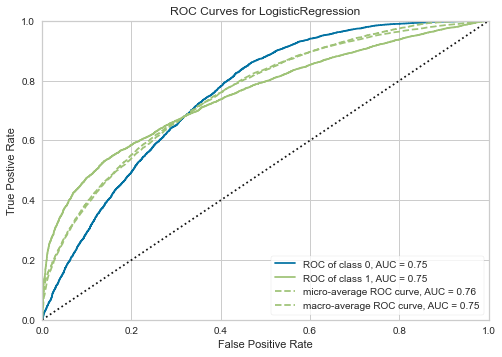

In [19]:
plot_model(model_lr, plot='auc')

### Precision-Recall Curve

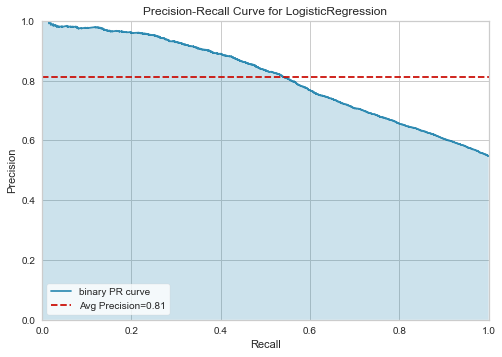

In [20]:
plot_model(model_lr, plot='pr')

### Feature Importance Plot

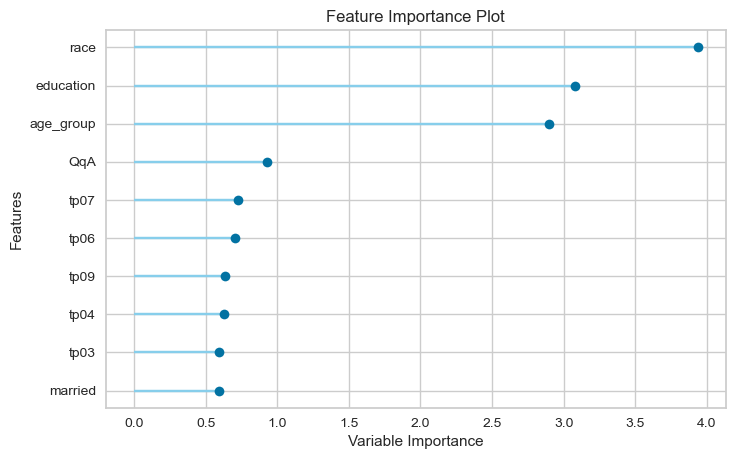

In [21]:
plot_model(model_lr, plot='feature')

### Confusion Matrix

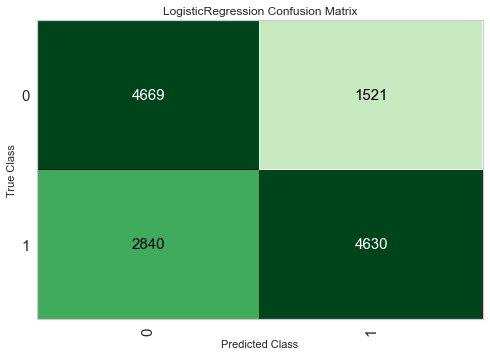

In [22]:
plot_model(model_lr, plot = 'confusion_matrix')

## `8.Predict for validation data`
#### predict_model(estimator, data=None, probability_threshold=None, platform=None, authentication=None, verbose=True)
`3. setup environment`에서 우리는 train_size = 0.7 (default)로 설정했었습니다. 여기서 남은 0.3의 데이터를 통해 해당 모델이 어느정도의 정확성을 가지고 있는지 보여줍니다.
- estimator : 사용할 모델을 입력합니다.
- data : 다른 데이터를 직접 입력해 줄 수 있습니다. 다만, `3.setup environment`에서 사용한 데이터와 같은 형태여야 합니다.
- probability_threshold : default는 0.5로 지정되어 있으며, 그 수치를 바꿀 수 있습니다.
- platform : cloud에서 모델을 불러올 수 있습니다. 
- authentication : 인증된 토큰을 입력할 수 있습니다. (플랫폼이 aws면 {‘bucket’ : ‘Name of Bucket on S3’}의 형태를 따라야 합니다)
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [27]:
for model in tuend_models:
    display(predict_model(model))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6884,0.7595,0.6427,0.7514,0.6928,0.3805,0.3853


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wf_02_0_1.0,wf_02_1_0.0,wf_02_1_1.0,wf_03_0_0.0,wf_03_0_1.0,wf_03_1_0.0,wf_03_1_1.0,voted,Label,Score
0,0.540892,2.048287,0.487898,2.056267,0.499742,2.019012,0.537439,2.071207,0.538739,2.095080,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0.3465
1,0.564892,2.014875,0.487898,2.185831,0.530138,2.129678,0.549449,2.016468,0.537259,2.038894,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.5255
2,0.540892,1.978306,0.557456,2.094086,0.574759,1.999249,0.537439,2.079369,0.538739,2.037582,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.6246
3,0.540892,1.930310,0.557456,2.120226,0.530138,2.108905,0.549449,2.106527,0.538197,2.140323,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9648
4,0.564892,1.952319,0.522095,2.103639,0.499742,2.016863,0.549449,2.006569,0.538197,2.242415,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.7833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,0.540892,1.937326,0.557456,2.091049,0.528323,2.033552,0.549449,2.005488,0.538197,2.088768,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0.7404
13656,0.540892,2.026509,0.487898,2.057383,0.499742,2.105543,0.537439,2.104186,0.538197,2.170006,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9670
13657,0.564892,2.136923,0.487898,2.154224,0.530138,2.325626,0.549449,2.171025,0.537259,2.213647,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.7488
13658,0.540892,2.079483,0.627831,2.110805,0.574759,2.013260,0.549449,2.127429,0.537259,2.052998,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.5492


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6887,0.7633,0.6481,0.7488,0.6948,0.3804,0.3846


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wf_02_0_1.0,wf_02_1_0.0,wf_02_1_1.0,wf_03_0_0.0,wf_03_0_1.0,wf_03_1_0.0,wf_03_1_1.0,voted,Label,Score
0,0.540892,2.048287,0.487898,2.056267,0.499742,2.019012,0.537439,2.071207,0.538739,2.095080,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0.3332
1,0.564892,2.014875,0.487898,2.185831,0.530138,2.129678,0.549449,2.016468,0.537259,2.038894,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.5491
2,0.540892,1.978306,0.557456,2.094086,0.574759,1.999249,0.537439,2.079369,0.538739,2.037582,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.6219
3,0.540892,1.930310,0.557456,2.120226,0.530138,2.108905,0.549449,2.106527,0.538197,2.140323,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9528
4,0.564892,1.952319,0.522095,2.103639,0.499742,2.016863,0.549449,2.006569,0.538197,2.242415,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.7947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,0.540892,1.937326,0.557456,2.091049,0.528323,2.033552,0.549449,2.005488,0.538197,2.088768,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0.7174
13656,0.540892,2.026509,0.487898,2.057383,0.499742,2.105543,0.537439,2.104186,0.538197,2.170006,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9687
13657,0.564892,2.136923,0.487898,2.154224,0.530138,2.325626,0.549449,2.171025,0.537259,2.213647,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.7421
13658,0.540892,2.079483,0.627831,2.110805,0.574759,2.013260,0.549449,2.127429,0.537259,2.052998,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.6242


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6893,0.7582,0.6439,0.7523,0.6939,0.3823,0.3871


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wf_02_0_1.0,wf_02_1_0.0,wf_02_1_1.0,wf_03_0_0.0,wf_03_0_1.0,wf_03_1_0.0,wf_03_1_1.0,voted,Label,Score
0,0.540892,2.048287,0.487898,2.056267,0.499742,2.019012,0.537439,2.071207,0.538739,2.095080,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0.3360
1,0.564892,2.014875,0.487898,2.185831,0.530138,2.129678,0.549449,2.016468,0.537259,2.038894,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.4277
2,0.540892,1.978306,0.557456,2.094086,0.574759,1.999249,0.537439,2.079369,0.538739,2.037582,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.6264
3,0.540892,1.930310,0.557456,2.120226,0.530138,2.108905,0.549449,2.106527,0.538197,2.140323,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9684
4,0.564892,1.952319,0.522095,2.103639,0.499742,2.016863,0.549449,2.006569,0.538197,2.242415,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.7945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,0.540892,1.937326,0.557456,2.091049,0.528323,2.033552,0.549449,2.005488,0.538197,2.088768,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0.6943
13656,0.540892,2.026509,0.487898,2.057383,0.499742,2.105543,0.537439,2.104186,0.538197,2.170006,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9857
13657,0.564892,2.136923,0.487898,2.154224,0.530138,2.325626,0.549449,2.171025,0.537259,2.213647,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.7272
13658,0.540892,2.079483,0.627831,2.110805,0.574759,2.013260,0.549449,2.127429,0.537259,2.052998,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.4562


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6858,0.7549,0.6612,0.7372,0.6971,0.3727,0.3751


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wf_02_0_1.0,wf_02_1_0.0,wf_02_1_1.0,wf_03_0_0.0,wf_03_0_1.0,wf_03_1_0.0,wf_03_1_1.0,voted,Label,Score
0,0.540892,2.048287,0.487898,2.056267,0.499742,2.019012,0.537439,2.071207,0.538739,2.095080,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0.3219
1,0.564892,2.014875,0.487898,2.185831,0.530138,2.129678,0.549449,2.016468,0.537259,2.038894,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.6837
2,0.540892,1.978306,0.557456,2.094086,0.574759,1.999249,0.537439,2.079369,0.538739,2.037582,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.7335
3,0.540892,1.930310,0.557456,2.120226,0.530138,2.108905,0.549449,2.106527,0.538197,2.140323,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9137
4,0.564892,1.952319,0.522095,2.103639,0.499742,2.016863,0.549449,2.006569,0.538197,2.242415,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.8310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,0.540892,1.937326,0.557456,2.091049,0.528323,2.033552,0.549449,2.005488,0.538197,2.088768,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0.6817
13656,0.540892,2.026509,0.487898,2.057383,0.499742,2.105543,0.537439,2.104186,0.538197,2.170006,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9152
13657,0.564892,2.136923,0.487898,2.154224,0.530138,2.325626,0.549449,2.171025,0.537259,2.213647,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.7611
13658,0.540892,2.079483,0.627831,2.110805,0.574759,2.013260,0.549449,2.127429,0.537259,2.052998,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.7312


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6807,0.7544,0.6198,0.7527,0.6798,0.3674,0.3743


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wf_02_0_1.0,wf_02_1_0.0,wf_02_1_1.0,wf_03_0_0.0,wf_03_0_1.0,wf_03_1_0.0,wf_03_1_1.0,voted,Label,Score
0,0.540892,2.048287,0.487898,2.056267,0.499742,2.019012,0.537439,2.071207,0.538739,2.095080,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0.3306
1,0.564892,2.014875,0.487898,2.185831,0.530138,2.129678,0.549449,2.016468,0.537259,2.038894,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.5786
2,0.540892,1.978306,0.557456,2.094086,0.574759,1.999249,0.537439,2.079369,0.538739,2.037582,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.7002
3,0.540892,1.930310,0.557456,2.120226,0.530138,2.108905,0.549449,2.106527,0.538197,2.140323,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.8977
4,0.564892,1.952319,0.522095,2.103639,0.499742,2.016863,0.549449,2.006569,0.538197,2.242415,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.8016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,0.540892,1.937326,0.557456,2.091049,0.528323,2.033552,0.549449,2.005488,0.538197,2.088768,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0.6558
13656,0.540892,2.026509,0.487898,2.057383,0.499742,2.105543,0.537439,2.104186,0.538197,2.170006,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9026
13657,0.564892,2.136923,0.487898,2.154224,0.530138,2.325626,0.549449,2.171025,0.537259,2.213647,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.7282
13658,0.540892,2.079483,0.627831,2.110805,0.574759,2.013260,0.549449,2.127429,0.537259,2.052998,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.6633


## `9.Finalize for Deployment`
#### finalize_model(estimator)
생성한 모델을 최종적으로 사용할 모델로 변환합니다. 이 과정에서는 train_size = 1로, 모든 데이터를 사용해 재학습합니다.
- Catboost Classifier가 가장 AUC Score가 높았기 때문에, model_cat 단일 모델을 finalize 합니다.

In [28]:
final_model = finalize_model(model_catboost)

## `10. Prediction`
- predict를 진행하면, 데이터의 마지막열에 "Label", "Score" 2가지 열이 추가됩니다.
    - Label은 예측한 결과값 입니다.
    - Score은 결과값이 나올 확률 입니다. Score를 기반으로 0.5를 넘기면 1, 넘기지 못하면 0으로 Label이 적용됩니다.

In [29]:
prediction = predict_model(final_model, data = test)
prediction.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_13_0,wr_13_1,wf_01_0,wf_01_1,wf_02_0,wf_02_1,wf_03_0,wf_03_1,Label,Score
0,0,0.563033,736,0.522095,2941,0.570634,4621,0.549449,4857,0.538197,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.6999
1,1,0.563033,514,0.522095,1952,0.570634,1552,0.548998,821,0.534566,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.9013
2,2,0.563033,500,0.522095,2507,0.530138,480,0.537439,614,0.538197,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.4899
3,3,0.564892,669,0.487898,1050,0.574759,1435,0.537439,2252,0.538739,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.1474
4,4,0.540892,499,0.487898,1243,0.574759,845,0.537439,1666,0.538197,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.7982


## `11. Save Model`
#### save_model(model, model_name, verbose=True)
- model : 저장할 모델을 입력합니다.
- model_name : 저장할 모델의 이름을 입력합니다.
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [30]:
save_model(final_model,'Pycaret_Classification_Beginners_03012021')

Transformation Pipeline and Model Succesfully Saved


## `12. Load Model`
#### load_model(model_name, platform = None, authentication = None, verbose=True)
- model_name : 불러올 모델의 이름을 입력합니다.
- platform : cloud에서 모델을 불러올 수 있습니다.
- authentication : 인증된 토큰을 입력할 수 있습니다. (플랫폼이 aws면 {‘bucket’ : ‘Name of Bucket on S3’}의 형태를 따라야 합니다)
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [31]:
saved_final_model = load_model('Pycaret_Classification_Beginners_03012021')

new_prediction = predict_model(saved_final_model, data=test)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_13_0,wr_13_1,wf_01_0,wf_01_1,wf_02_0,wf_02_1,wf_03_0,wf_03_1,Label,Score
0,0,0.563033,736,0.522095,2941,0.570634,4621,0.549449,4857,0.538197,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.6999
1,1,0.563033,514,0.522095,1952,0.570634,1552,0.548998,821,0.534566,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.9013
2,2,0.563033,500,0.522095,2507,0.530138,480,0.537439,614,0.538197,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.4899
3,3,0.564892,669,0.487898,1050,0.574759,1435,0.537439,2252,0.538739,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.1474
4,4,0.540892,499,0.487898,1243,0.574759,845,0.537439,1666,0.538197,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.7982


## `13.Submit`
- Public Score : 0.7713789835
- Private Score : 0.7721794326

In [32]:
sample_submission = pd.read_csv(data_path+'sample_submission.csv')
sample_submission['voted'] = new_prediction['Score']
display(sample_submission.head())
sample_submission.to_csv('Pycaret_Classification_Beginners_03012021.csv',index=False)

,index,voted
0,0,0.6999
1,1,0.9013
2,2,0.4899
3,3,0.1474
4,4,0.7982
